# Understanding Income Inequality

Organizations are working to ensure equal pay to individuals irrespective of their background. Many of these background traits are not in one’s control but may affect their affluency. In this project, we will use the given dataset about US citizens to understand if the pay differs based on their characteristics.
The input variables are related to individual characteristics, family status, background, and employment. For the output variable, those with a salary above 50K are assumed in the high-income buckets, while others in the low-income bucket. Thus, it is a binary classification problem. We will try to analyze if the pay differs, which can be used to understand which factors impact the most that can help policymakers make decisions.

## Importing libraries & data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
df_orig = pd.read_csv('week1-adult-all.csv', header=None, names=columns)

In [3]:
# inspecting dataset

In [4]:
df_orig.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# PART 1: Data Cleaning
## Finding unique and missing values in categorical attributes

In [5]:
for col in df_orig.iloc[:,[1,3,5,6,7,8,9,13,14]]:
    print(col,df_orig[col].unique())

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex ['Male' 'Female']
native-country ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 

In [6]:
df=df_orig.replace('?',np.nan)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df = df.drop('fnlwgt', axis=1) # ignoring as given in data description
df = df.drop('education', axis=1) # removing since considered in education-num

## Fixing missing values in workclass, occupation, native-country

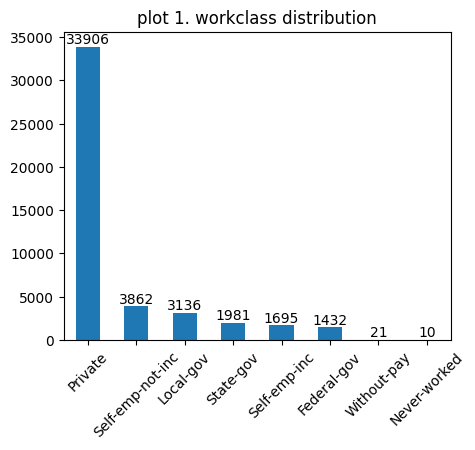

In [9]:
ax = df['workclass'].value_counts().plot(kind='bar', title='plot 1. workclass distribution', figsize=(5,4))
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

In [10]:
df['workclass'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Private             73.6%
Self-emp-not-inc     8.4%
Local-gov            6.8%
State-gov            4.3%
Self-emp-inc         3.7%
Federal-gov          3.1%
Without-pay          0.0%
Never-worked         0.0%
Name: workclass, dtype: object

In [11]:
# Replace workclass missing values with mode- Private
df.workclass.fillna('Private',inplace=True)

In [12]:
df.workclass.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: workclass, Length: 48842, dtype: bool

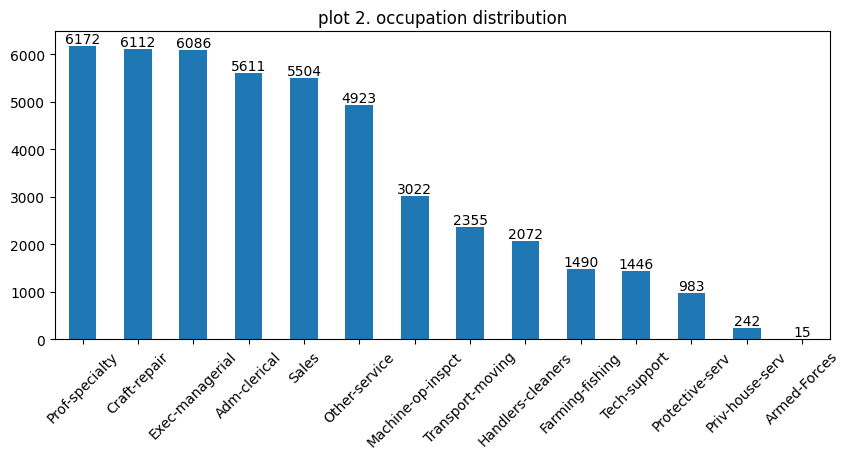

In [13]:
ax = df['occupation'].value_counts().plot(kind='bar', title='plot 2. occupation distribution', figsize=(10,4))
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

In [14]:
df['occupation'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Prof-specialty       13.4%
Craft-repair         13.3%
Exec-managerial      13.2%
Adm-clerical         12.2%
Sales                12.0%
Other-service        10.7%
Machine-op-inspct     6.6%
Transport-moving      5.1%
Handlers-cleaners     4.5%
Farming-fishing       3.2%
Tech-support          3.1%
Protective-serv       2.1%
Priv-house-serv       0.5%
Armed-Forces          0.0%
Name: occupation, dtype: object

In [15]:
# Remove rows with missing occupation
df = df.dropna(subset=['occupation'])

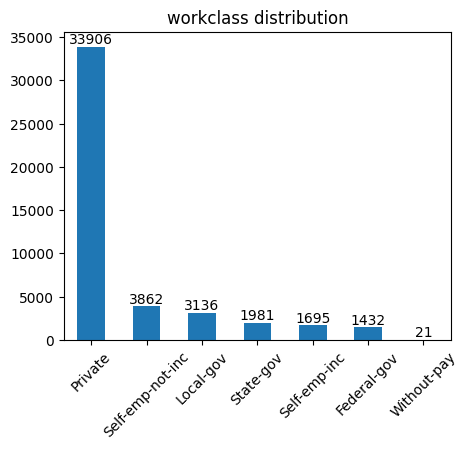

In [16]:
ax = df['workclass'].value_counts().plot(kind='bar', title='workclass distribution', figsize=(5,4))
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

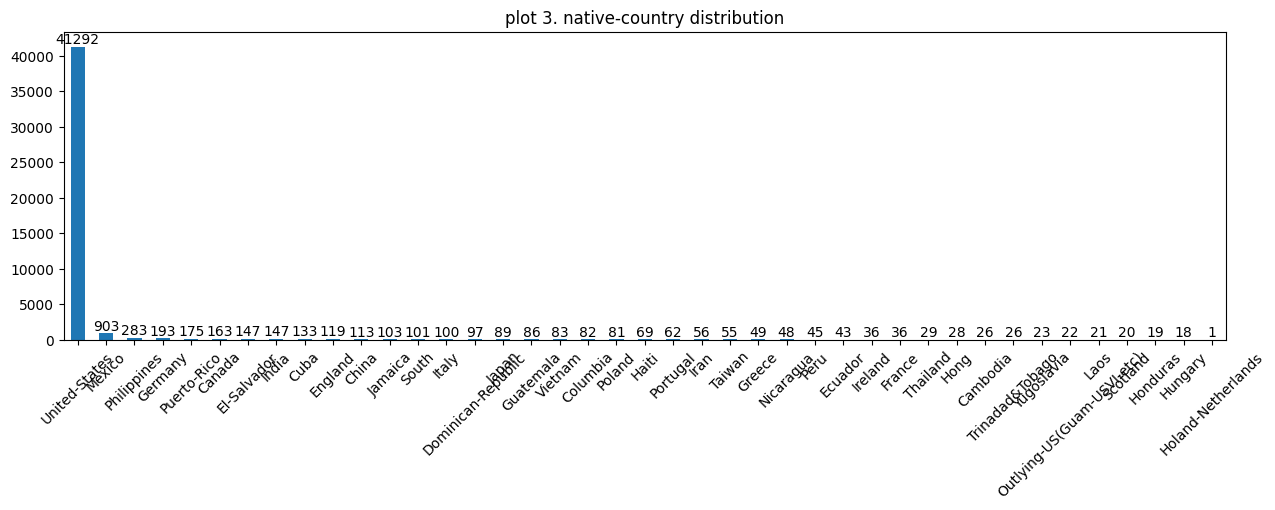

In [17]:
ax = df['native-country'].value_counts().plot(kind='bar', title='plot 3. native-country distribution', figsize=(15,4))
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

In [18]:
df['native-country'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

United-States                 91.3%
Mexico                         2.0%
Philippines                    0.6%
Germany                        0.4%
Puerto-Rico                    0.4%
Canada                         0.4%
El-Salvador                    0.3%
India                          0.3%
Cuba                           0.3%
England                        0.3%
China                          0.2%
Jamaica                        0.2%
South                          0.2%
Italy                          0.2%
Dominican-Republic             0.2%
Japan                          0.2%
Guatemala                      0.2%
Vietnam                        0.2%
Columbia                       0.2%
Poland                         0.2%
Haiti                          0.2%
Portugal                       0.1%
Iran                           0.1%
Taiwan                         0.1%
Greece                         0.1%
Nicaragua                      0.1%
Peru                           0.1%
Ecuador                     

In [19]:
# Replace native-country missing values with mode- US
df['native-country'].fillna('United-States',inplace=True)

## Checking anamolies

plot 4. other categorical distributions


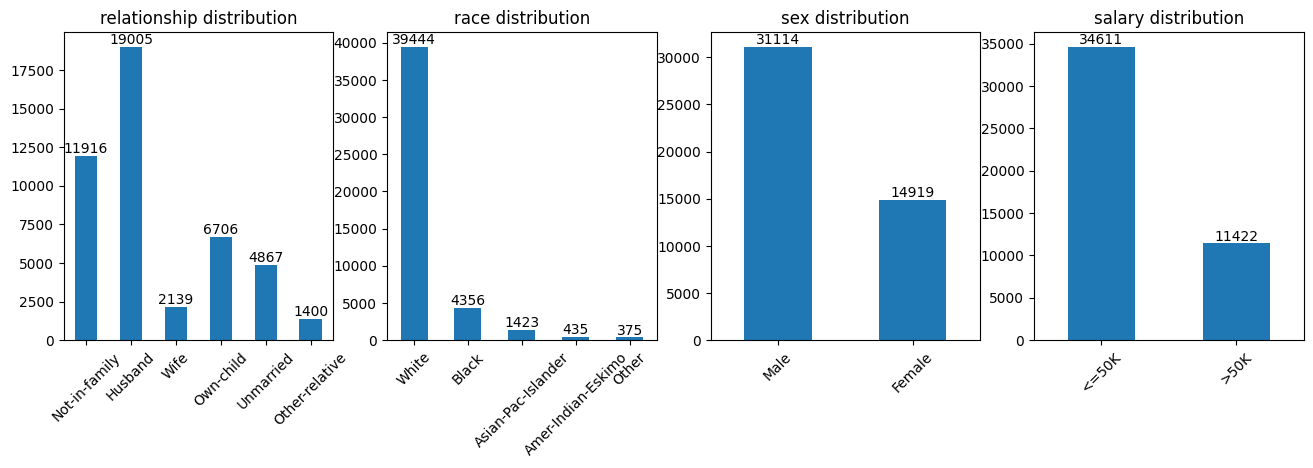

In [20]:
print('\033[1m' + 'plot 4. other categorical distributions' +'\033[0m')
plt.figure(figsize=(16,4))
plt.subplot(1,4,1); ax = df.relationship.value_counts(sort=False).plot.bar(title='relationship distribution')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,2); ax = df.race.value_counts(sort=False).plot.bar(title='race distribution')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,3); ax = df.sex.value_counts(sort=False).plot.bar(title='sex distribution')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,4); ax = df.salary.value_counts(sort=False).plot.bar(title='salary distribution')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

plot 5: bar plot of numerical distributions


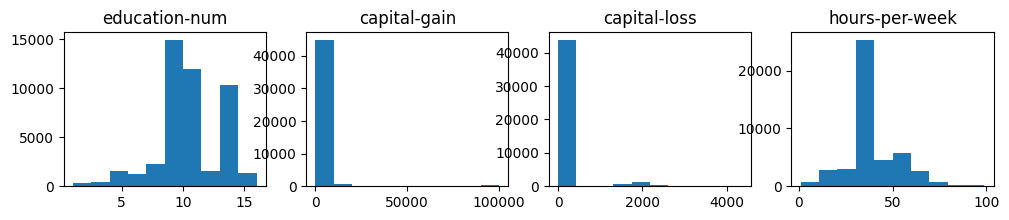

In [21]:
print('\033[1m' + 'plot 5: bar plot of numerical distributions' +'\033[0m')
plt.figure(figsize=(12,2))
plt.subplot(1,4,1); plt.hist(df['education-num']); plt.title('education-num')
plt.subplot(1,4,2); plt.hist(df['capital-gain']); plt.title('capital-gain')
plt.subplot(1,4,3); plt.hist(df['capital-loss']); plt.title('capital-loss')
plt.subplot(1,4,4); plt.hist(df['hours-per-week']); plt.title('hours-per-week');

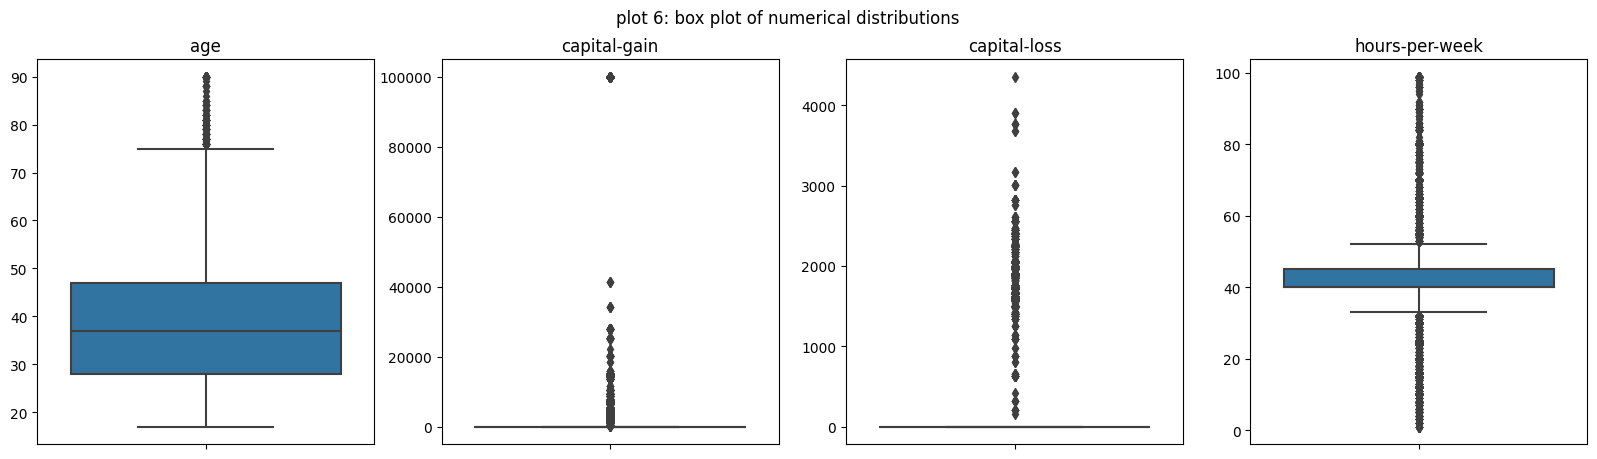

In [22]:
fig, axs = plt.subplots(1,4,figsize=(20,5))
fig.suptitle('plot 6: box plot of numerical distributions')
sns.boxplot(ax=axs[0],y=df['age']).set(xlabel=None,ylabel=None); axs[0].title.set_text('age')
sns.boxplot(ax=axs[1],y=df['capital-gain']).set(xlabel=None,ylabel=None); axs[1].title.set_text('capital-gain')
sns.boxplot(ax=axs[2],y=df['capital-loss']).set(ylabel=None); axs[2].title.set_text('capital-loss')
sns.boxplot(ax=axs[3],y=df['hours-per-week']).set(ylabel=None); axs[3].title.set_text('hours-per-week')

In [23]:
df['capital-gain'][df['capital-gain'] > 60000].count()

239

In [24]:
# Removing Capital-loss outliers
df = df[df['capital-gain'] < 60000]

## Merging Capital-gain, capital-loss

In [25]:
df[df['capital-gain']!=0]['capital-loss'].sum()

0

In [26]:
df[df['capital-loss']!=0]['capital-gain'].sum()

0

In [27]:
# Creating new column with positive capital-gain and negative capital-losss
df['capital-gain-loss']=df['capital-gain']-df['capital-loss']

In [28]:
df = df.drop(['capital-gain','capital-loss'], axis=1)

In [29]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,capital-gain-loss
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0


In [30]:
df = df[['age','workclass','education-num','marital-status','occupation','relationship','race','sex','capital-gain-loss','hours-per-week','native-country','salary']]

# PART 2
## EDA: Bivariate analysis between output (salary) and other variables

In [31]:
tmp = pd.crosstab(df.workclass,df.salary,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','<=50K','>50K','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

salary,<=50K,>50K
workclass,,
Federal-gov,871,559
Local-gov,2209,920
Private,26519,7261
Self-emp-inc,757,878
Self-emp-not-inc,2785,1037
State-gov,1451,526
Without-pay,19,2


In [32]:
tmp = pd.crosstab(df['marital-status'],df.salary,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','<=50K','>50K','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

salary,<=50K,>50K
marital-status,,
Divorced,5701,642
Married-AF-spouse,18,13
Married-civ-spouse,11705,9555
Married-spouse-absent,526,56
Never-married,14153,702
Separated,1334,95
Widowed,1174,120


In [33]:
tmp = pd.crosstab(df.occupation,df.salary,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','<=50K','>50K','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

salary,<=50K,>50K
occupation,,
Adm-clerical,4843,760
Armed-Forces,10,5
Craft-repair,4729,1367
Exec-managerial,3178,2841
Farming-fishing,1317,170
Handlers-cleaners,1934,136
Machine-op-inspct,2650,371
Other-service,4719,201
Priv-house-serv,239,3


In [34]:
tmp = pd.crosstab(df.relationship,df.salary,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','<=50K','>50K','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

salary,<=50K,>50K
relationship,,
Husband,10336,8493
Not-in-family,10663,1217
Other-relative,1349,51
Own-child,6598,104
Unmarried,4561,299
Wife,1104,1019


In [35]:
tmp = pd.crosstab(df.race,df.salary,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','<=50K','>50K','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

salary,<=50K,>50K
race,,
Amer-Indian-Eskimo,382,53
Asian-Pac-Islander,1020,389
Black,3804,542
Other,328,44
White,29077,10155


In [36]:
tmp = pd.crosstab(df.sex,df.salary,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','<=50K','>50K','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

salary,<=50K,>50K
sex,,
Female,13225,1659
Male,21386,9524


In [37]:
tmp = pd.crosstab(df['native-country'],df.salary,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','<=50K','>50K','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

salary,<=50K,>50K
native-country,,
Cambodia,17,9
Canada,103,59
China,77,35
Columbia,78,4
Cuba,99,34
Dominican-Republic,92,4
Ecuador,37,6
El-Salvador,136,11
England,72,47


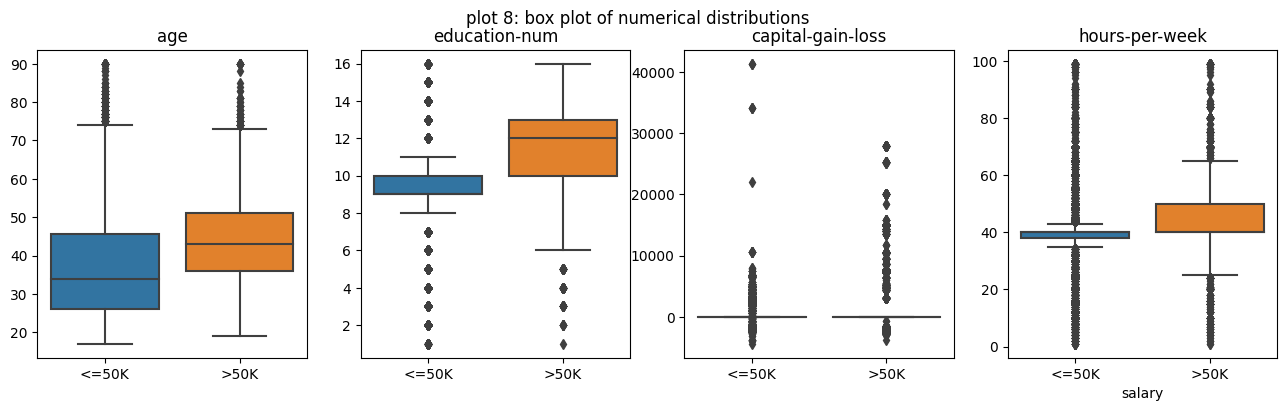

In [38]:
fig, axs = plt.subplots(1,4,figsize=(16,4))
fig.suptitle('plot 8: box plot of numerical distributions')
sns.boxplot(ax=axs[0],x=df.salary,y=df['age']).set(xlabel=None,ylabel=None); axs[0].title.set_text('age')
sns.boxplot(ax=axs[1],x=df.salary,y=df['education-num']).set(xlabel=None,ylabel=None); axs[1].title.set_text('education-num')
sns.boxplot(ax=axs[2],x=df.salary,y=df['capital-gain-loss']).set(xlabel=None,ylabel=None); axs[2].title.set_text('capital-gain-loss')
sns.boxplot(ax=axs[3],x=df.salary,y=df['hours-per-week']).set(ylabel=None); axs[3].title.set_text('hours-per-week')

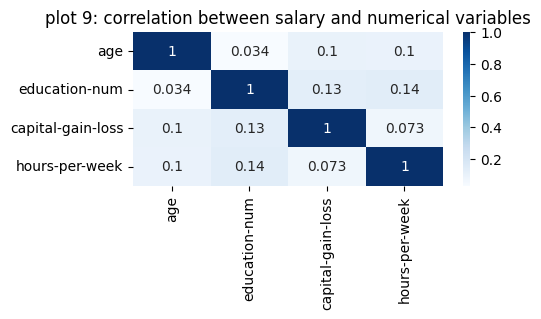

In [39]:
plt.figure(figsize=(5,2))
sns.heatmap(df[['age','education-num','capital-gain-loss','hours-per-week']].corr(),cbar=True,annot=True,cmap='Blues')
plt.title('plot 9: correlation between salary and numerical variables');

## Nearest Neighbor Model
### With numerical inputs

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45794 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45794 non-null  int64 
 1   workclass          45794 non-null  object
 2   education-num      45794 non-null  int64 
 3   marital-status     45794 non-null  object
 4   occupation         45794 non-null  object
 5   relationship       45794 non-null  object
 6   race               45794 non-null  object
 7   sex                45794 non-null  object
 8   capital-gain-loss  45794 non-null  int64 
 9   hours-per-week     45794 non-null  int64 
 10  native-country     45794 non-null  object
 11  salary             45794 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [41]:
x = df.iloc[:,[0,2,8,9]]
y = df.salary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [42]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("\nclassification report:\n",classification_report(y_test, y_pred))

confusion matrix:
 [[6593  345]
 [1217 1004]]

classification report:
               precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      6938
        >50K       0.74      0.45      0.56      2221

    accuracy                           0.83      9159
   macro avg       0.79      0.70      0.73      9159
weighted avg       0.82      0.83      0.81      9159



In [43]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("For k = 4, accuracy =",knn.score(x_test, y_test))
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
print("For k = 6, accuracy =",knn.score(x_test, y_test))
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
print("For k = 8, accuracy =",knn.score(x_test, y_test))

For k = 4, accuracy = 0.8294573643410853
For k = 6, accuracy = 0.8302216399170215
For k = 8, accuracy = 0.8332787422207665


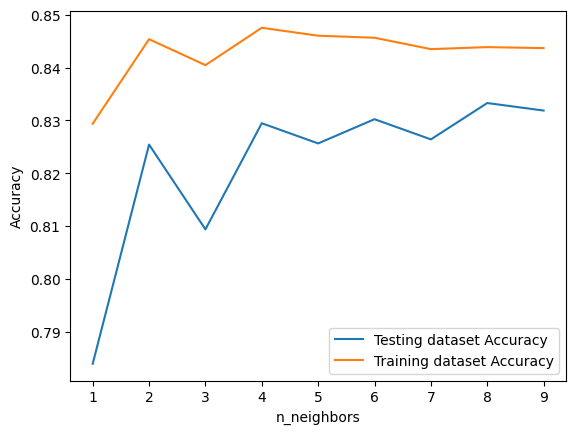

In [44]:
# Testing for various values of K

neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### With numerical and encoded categorical variables

In [45]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K


In [46]:
le = preprocessing.LabelEncoder()
df_enc = df
df_enc['workclass_enc']=le.fit_transform(df.workclass)
df_enc['marital-status_enc']=le.fit_transform(df['marital-status'])
df_enc['occupation_enc']=le.fit_transform(df.occupation)
df_enc['relationship_enc']=le.fit_transform(df.relationship)
df_enc['race_enc']=le.fit_transform(df.race)
df_enc['sex_enc']=le.fit_transform(df.sex)
df_enc['native-country_enc']=le.fit_transform(df['native-country'])

In [47]:
df_enc = df_enc[['age','workclass_enc','education-num','marital-status_enc','occupation_enc','relationship_enc','race_enc','sex_enc','capital-gain-loss','hours-per-week','native-country_enc','salary']]

In [48]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45794 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 45794 non-null  int64 
 1   workclass_enc       45794 non-null  int32 
 2   education-num       45794 non-null  int64 
 3   marital-status_enc  45794 non-null  int32 
 4   occupation_enc      45794 non-null  int32 
 5   relationship_enc    45794 non-null  int32 
 6   race_enc            45794 non-null  int32 
 7   sex_enc             45794 non-null  int32 
 8   capital-gain-loss   45794 non-null  int64 
 9   hours-per-week      45794 non-null  int64 
 10  native-country_enc  45794 non-null  int32 
 11  salary              45794 non-null  object
dtypes: int32(7), int64(4), object(1)
memory usage: 3.3+ MB


In [49]:
x = df_enc.iloc[:,0:10]
y = df_enc.salary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [50]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("\nclassification report:\n",classification_report(y_test, y_pred))

confusion matrix:
 [[6525  413]
 [1007 1214]]

classification report:
               precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      6938
        >50K       0.75      0.55      0.63      2221

    accuracy                           0.84      9159
   macro avg       0.81      0.74      0.77      9159
weighted avg       0.84      0.84      0.84      9159



In [51]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("For k = 4, accuracy =",knn.score(x_test, y_test))
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
print("For k = 6, accuracy =",knn.score(x_test, y_test))
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
print("For k = 8, accuracy =",knn.score(x_test, y_test))

For k = 4, accuracy = 0.8449612403100775
For k = 6, accuracy = 0.84998362266623
For k = 8, accuracy = 0.8529315427448412


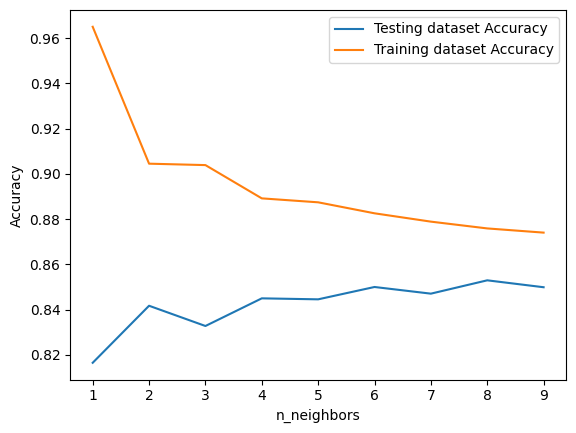

In [52]:
# Testing for various values of K

neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [53]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("\nclassification report:\n",classification_report(y_test, y_pred))

confusion matrix:
 [[6514  424]
 [ 923 1298]]

classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      6938
        >50K       0.75      0.58      0.66      2221

    accuracy                           0.85      9159
   macro avg       0.81      0.76      0.78      9159
weighted avg       0.85      0.85      0.85      9159



# Conclusion

The US population dataset was cleaned, prepared, manipulated and explored to understand how a person’s features impact their income category. Preliminary analysis indicates that ‘education’, ‘age’ and ‘native-country’ may affect the salary group of a person more than other attributes like even ‘hours-per-week’. There was not much correlation between ‘age’, ‘education’, ‘capital-gain-loss’ or ‘hours-per-week’.
While iteratively building nearest-neighbor models to predict the salary group, it was found that model accuracy marginally increases when the k-value increases. The final model had an accuracy of 85.3%. Hence this model can be realistically used to predict a person’s income bucket, i.e. whether they are earning more or less than 50K. The model seems better at predicting the lower-income group. Conversely, it also highlights that a person’s characteristics impact their salary range and thus can contribute to their affluency. Companies and policymakers can use this information to ensure fair pay for all.